## <center> Customer Review Analysis for Leading Woman Clothing E-Commerce Company


We step into the domain of a renowned women's clothing e-commerce powerhouse, fueled by a fervent curiosity to decipher the nuances of customer behavior. Our mission revolves around delving into customer demographics and meticulously analyzing the reviews generously contributed on our online platform.
    
#### Business Objectives:
Our journey is guided by a set of paramount objectives:

a. Exploratory Analysis: We shall embark on an exploratory analysis, seeking to unravel the underlying data patterns.

b. Text Mining for Sentiment: Text mining shall unveil the most prevalent words for both positive and negative sentiments, manifesting as captivating word clouds.

c. Sentiment Analysis Across Dimensions: We shall gauge sentiment across a multitude of dimensions: categories, subcategories, products, locations, and age groups. This panoramic view will illuminate the diverse sentiments harbored by our cherished customers.

d. Predictive Analytics: With predictive analytics as our compass, we aspire to discern the catalysts that inspire customers to recommend our products.

e. Topic Mining for Insights: Lastly, we shall delve into topic mining, endeavoring to uncover the hidden themes concealed within our data's topics.

This journey promises to be illuminating, unveiling the secrets and subtleties of our customer landscape.

#### Workflows:

a. Comprehensive Exploratory Analysis and Dashboard Creation: Our initial focus is on conducting a thorough exploratory analysis. We'll harness the insights gained from this analysis to craft an informative dashboard. This dashboard will feature compelling visualizations such as word clouds, frequency plots, and sentiment analysis, dissected by channels, locations, categories, subcategories, age groups, and more.

b. Predictive Analytics Endeavors: In the realm of predictive analytics, we shall embark on several key tasks. This includes venturing into topic mining to uncover latent themes within the data. Additionally, we'll develop classification models to identify customers likely to recommend our offerings. Furthermore, we aim to predict product ratings based on the reviews provided, adding another layer of predictive power to our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import pandas as pd
import nltk
import contractions
import re
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
nlp =spacy.load('en_core_web_lg')
vectors= len(nlp.vocab.vectors)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
stop_words = nltk.corpus.stopwords.words('english')

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\NLP-Women Clothing ECommerce Platform\\Womens Clothing Reviews Data.xlsx')

In [5]:
data.head(3)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0


In [6]:
data.shape

(23486, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


#### Checking For Missing Values and Handling it

In [8]:
data.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [9]:
data.drop(labels =['Product ID','Review Title'],axis = 1,inplace = True)

In [10]:
data[data['Review Text'].isnull()]

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Text,Rating,Recommend Flag
92,General Petite,Tops,Knits,Gurgaon,Mobile,23,NaN,5,1
93,General,Dresses,Dresses,Gurgaon,Mobile,31,NaN,5,1
98,General,Jackets,Outerwear,Mumbai,Mobile,50,NaN,5,1
135,General Petite,Tops,Knits,Gurgaon,Web,35,NaN,4,1
142,General,Jackets,Outerwear,Gurgaon,Web,35,NaN,5,1
...,...,...,...,...,...,...,...,...,...
23258,General,Tops,Knits,Mumbai,Web,35,NaN,4,1
23301,General,Tops,Knits,Mumbai,Web,52,NaN,5,1
23303,General,Tops,Blouses,Mumbai,Mobile,46,NaN,5,1
23470,General Petite,Dresses,Dresses,Gurgaon,Web,39,NaN,5,1


In [11]:
data = data[~data['Review Text'].isnull()]

In [12]:
data.shape

(22641, 9)

In [13]:
data.rename(columns={'Customer Age':'Customer_Age', 'Review Text':'Review_Text', 'Recommend Flag':'Recommend_Flag'}, inplace=True)

#### Data Analysis and Visualization

<Axes: xlabel='Customer_Age', ylabel='Count'>

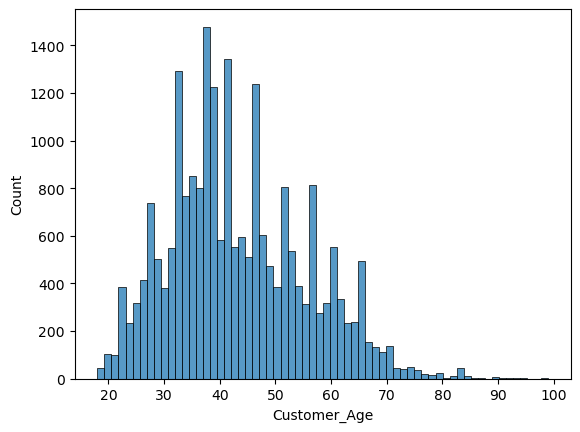

In [14]:
sns.histplot(data['Customer_Age'])

<Axes: xlabel='Rating', ylabel='Count'>

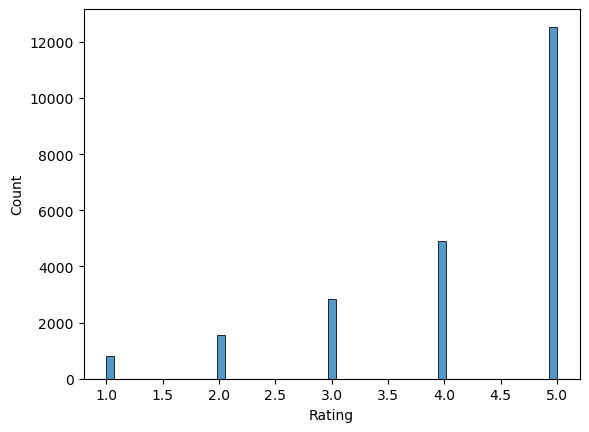

In [15]:
sns.histplot(data['Rating'])

In [16]:
subcategory1_rating = data.groupby(['Subcategory1'])['Rating'].mean()

<Axes: xlabel='Subcategory1', ylabel='Rating'>

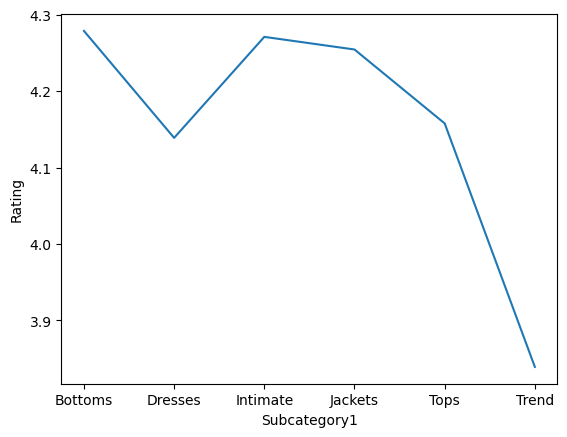

In [17]:
sns.lineplot(subcategory1_rating)

<Axes: xlabel='Channel', ylabel='Count'>

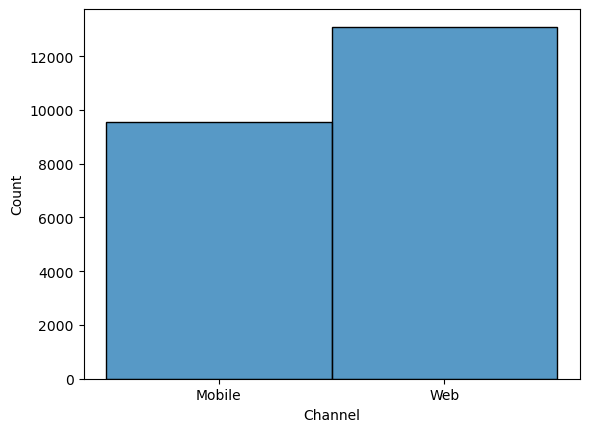

In [18]:
sns.histplot(data['Channel'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        22628 non-null  object
 1   Subcategory1    22628 non-null  object
 2   SubCategory2    22628 non-null  object
 3   Location        22641 non-null  object
 4   Channel         22641 non-null  object
 5   Customer_Age    22641 non-null  int64 
 6   Review_Text     22641 non-null  object
 7   Rating          22641 non-null  int64 
 8   Recommend_Flag  22641 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [20]:
data['Category'] = data['Category'].fillna(data.Category.mode()[0])
data['Subcategory1'] = data['Subcategory1'].fillna(data.Subcategory1.mode()[0])
data['SubCategory2'] = data['SubCategory2'].fillna(data.SubCategory2.mode()[0])

In [21]:
data.isnull().sum()

Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer_Age      0
Review_Text       0
Rating            0
Recommend_Flag    0
dtype: int64

In [22]:
data

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...
23481,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,I was very happy to snag this dress at such a ...,5,1
23482,General Petite,Tops,Knits,Gurgaon,Web,48,"It reminds me of maternity clothes. soft, stre...",3,1
23483,General Petite,Dresses,Dresses,Gurgaon,Web,31,"This fit well, but the top was very see throug...",3,0
23484,General,Dresses,Dresses,Gurgaon,Web,28,I bought this dress for a wedding i have this ...,3,1


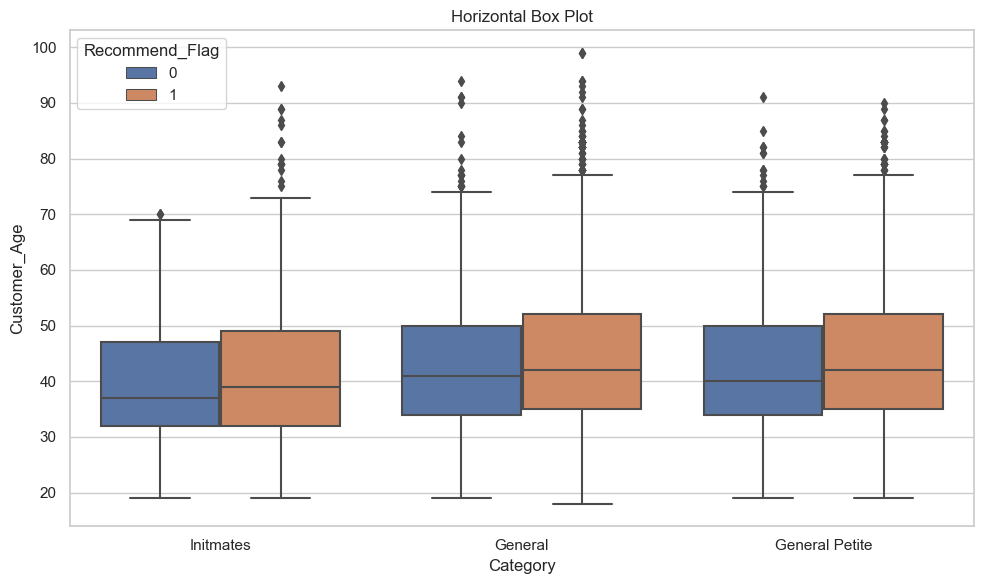

In [23]:
# Set the style for Seaborn (optional)
sns.set(style="whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.boxplot(data=data, y="Customer_Age", x="Category", hue="Recommend_Flag")

# Customize the plot (optional)
plt.xlabel("Category")
plt.ylabel("Customer_Age")
plt.title("Horizontal Box Plot")

# Show the plot
plt.legend(title="Recommend_Flag", loc="best")
plt.tight_layout()
plt.show()

In [24]:
customer_age_upperlimit = data['Customer_Age'].mean()+(3*data['Customer_Age'].std())
customer_age_lowerlimit = data['Customer_Age'].mean()-(3*data['Customer_Age'].std())

In [25]:
data.Customer_Age.clip(upper=customer_age_upperlimit, lower=customer_age_lowerlimit, inplace=True)

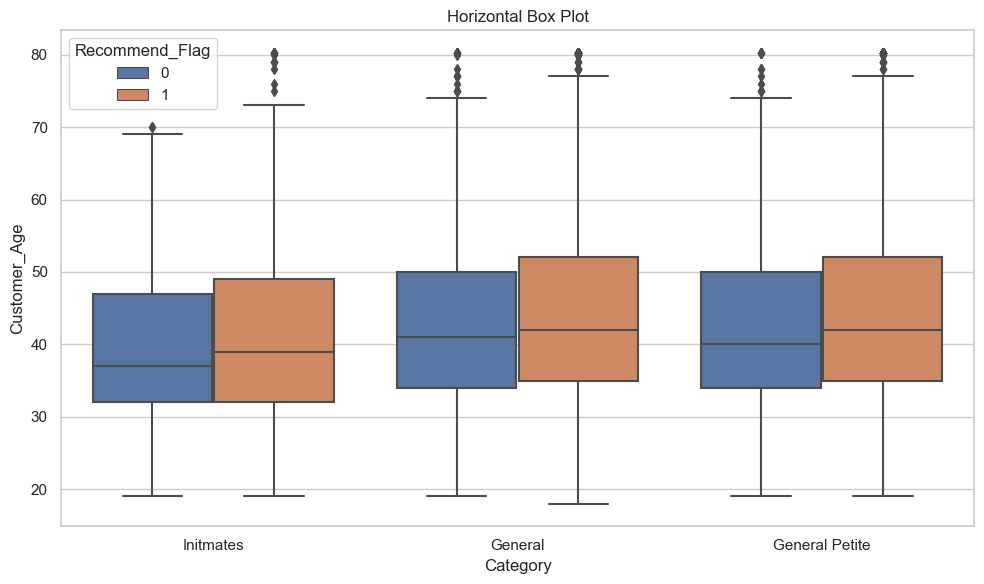

In [26]:
# Set the style for Seaborn (optional)
sns.set(style="whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.boxplot(data=data, y="Customer_Age", x="Category", hue="Recommend_Flag")

# Customize the plot (optional)
plt.xlabel("Category")
plt.ylabel("Customer_Age")
plt.title("Horizontal Box Plot")

# Show the plot
plt.legend(title="Recommend_Flag", loc="best")
plt.tight_layout()
plt.show()

### Cleaning the text data:

In [27]:
def convert_lower(text):
    text=text.lower()
    return text

def expand_contractions(text):
    text = contractions.fix(text)
    return text

def removal_spe_char(text):
    text = text.replace('...',' ')
    text = re.sub('[^a-zA-Z\s]','',text)
    return text

def stemming(text):
    text = [ps.stem(w) for w in text.split(" ")]
    return ' '.join(text)

def stopword_removal(text):
    text = [w for w in text.split(' ') if w not in stop_words]
    return ' '.join(text)

def special_mention(text):
    text = re.sub('@\w+','',text)
    return text

In [28]:
def clean_text(text):
    text = convert_lower(text)

    text = expand_contractions(text)

    text = removal_spe_char(text)

    text = stemming(text)

    text = stopword_removal(text)
    
    text = text.strip()

    return text

In [29]:
data['Review_clean_text'] = data['Review_Text'].apply(lambda x: clean_text(x))

In [30]:
data

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Review_clean_text
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33.0,Absolutely wonderful - silky and sexy and comf...,4,1,absolut wonder silki sexi comfort
1,General,Dresses,Dresses,Bangalore,Mobile,34.0,Love this dress! it's sooo pretty. i happene...,5,1,love thi dress sooo pretti happen find store...
2,General,Dresses,Dresses,Gurgaon,Mobile,60.0,I had such high hopes for this dress and reall...,3,0,high hope thi dress realli want work initi ord...
3,General Petite,Bottoms,Pants,Chennai,Web,50.0,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love thi jumpsuit fun flirti fabul e...
4,General,Tops,Blouses,Bangalore,Web,47.0,This shirt is very flattering to all due to th...,5,1,thi shirt veri flatter due adjust front tie pe...
...,...,...,...,...,...,...,...,...,...,...
23481,General Petite,Dresses,Dresses,Gurgaon,Mobile,34.0,I was very happy to snag this dress at such a ...,5,1,wa veri happi snag thi dress great price veri ...
23482,General Petite,Tops,Knits,Gurgaon,Web,48.0,"It reminds me of maternity clothes. soft, stre...",3,1,remind matern cloth soft stretchi shini materi...
23483,General Petite,Dresses,Dresses,Gurgaon,Web,31.0,"This fit well, but the top was very see throug...",3,0,thi fit well top wa veri see thi never would w...
23484,General,Dresses,Dresses,Gurgaon,Web,28.0,I bought this dress for a wedding i have this ...,3,1,bought thi dress wed thi summer cute unfortun ...


In [31]:
data.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer_Age', 'Review_Text', 'Rating', 'Recommend_Flag',
       'Review_clean_text'],
      dtype='object')

In [32]:
data['Review_Text'][23482]

'It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.'

In [33]:
def map_rating_to_sentiment(rating):
    if rating in [4, 5]:
        return 'positive'
    else:
        return 'negative'

In [34]:
data['Sentiment'] = data['Rating'].apply(map_rating_to_sentiment)

In [35]:
data

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Review_clean_text,Sentiment
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33.0,Absolutely wonderful - silky and sexy and comf...,4,1,absolut wonder silki sexi comfort,positive
1,General,Dresses,Dresses,Bangalore,Mobile,34.0,Love this dress! it's sooo pretty. i happene...,5,1,love thi dress sooo pretti happen find store...,positive
2,General,Dresses,Dresses,Gurgaon,Mobile,60.0,I had such high hopes for this dress and reall...,3,0,high hope thi dress realli want work initi ord...,negative
3,General Petite,Bottoms,Pants,Chennai,Web,50.0,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love thi jumpsuit fun flirti fabul e...,positive
4,General,Tops,Blouses,Bangalore,Web,47.0,This shirt is very flattering to all due to th...,5,1,thi shirt veri flatter due adjust front tie pe...,positive
...,...,...,...,...,...,...,...,...,...,...,...
23481,General Petite,Dresses,Dresses,Gurgaon,Mobile,34.0,I was very happy to snag this dress at such a ...,5,1,wa veri happi snag thi dress great price veri ...,positive
23482,General Petite,Tops,Knits,Gurgaon,Web,48.0,"It reminds me of maternity clothes. soft, stre...",3,1,remind matern cloth soft stretchi shini materi...,negative
23483,General Petite,Dresses,Dresses,Gurgaon,Web,31.0,"This fit well, but the top was very see throug...",3,0,thi fit well top wa veri see thi never would w...,negative
23484,General,Dresses,Dresses,Gurgaon,Web,28.0,I bought this dress for a wedding i have this ...,3,1,bought thi dress wed thi summer cute unfortun ...,negative


In [36]:
def word_check(w):
    s = [w for w in w if len(w)>4]
    return ' '.join(s)

In [37]:
data['Review_clean_text2'] = data['Review_clean_text'].apply(lambda x: word_check(x.split(' ')))

In [38]:
data.drop(columns='Review_clean_text', inplace=True)

In [39]:
label_mapping = {'positive':1, 'negative':0}
data['label'] = data['Sentiment'].apply(lambda x: label_mapping[x])

In [40]:
data = data.reset_index(drop=True)

In [41]:
data.head(3)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Sentiment,Review_clean_text2,label
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33.0,Absolutely wonderful - silky and sexy and comf...,4,1,positive,absolut wonder silki comfort,1
1,General,Dresses,Dresses,Bangalore,Mobile,34.0,Love this dress! it's sooo pretty. i happene...,5,1,positive,dress pretti happen store becaus never would o...,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60.0,I had such high hopes for this dress and reall...,3,0,negative,dress realli initi order petit small usual fou...,0


In [42]:
doc = list(data['Review_clean_text2'].values)

In [43]:
data.shape, len(doc)

((22641, 12), 22641)

##### Creating Word Cloud

In [44]:
positive_reviews = data[data['Sentiment'] == 'positive']
negative_reviews = data[data['Sentiment'] == 'negative']

In [45]:
# Combine all positive review texts into a single string
positive_text = ' '.join(positive_reviews['Review_clean_text2'])
positive_text = ' '.join(negative_reviews['Review_clean_text2'])

In [46]:
# Create a WordCloud object for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

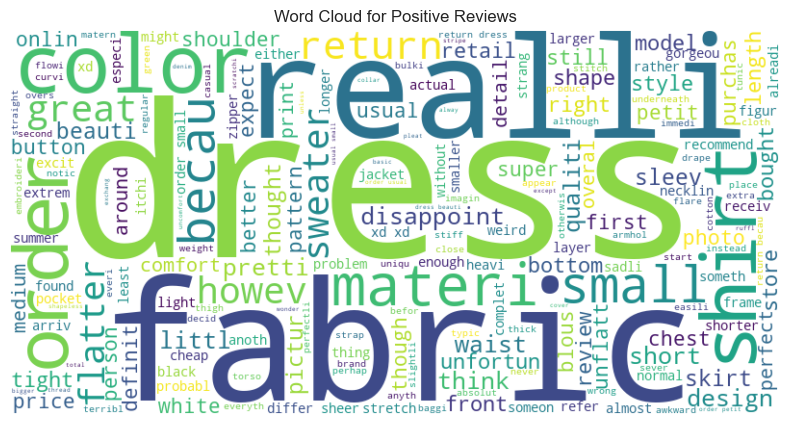

In [47]:
# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')  # Turn off the axis
plt.show()

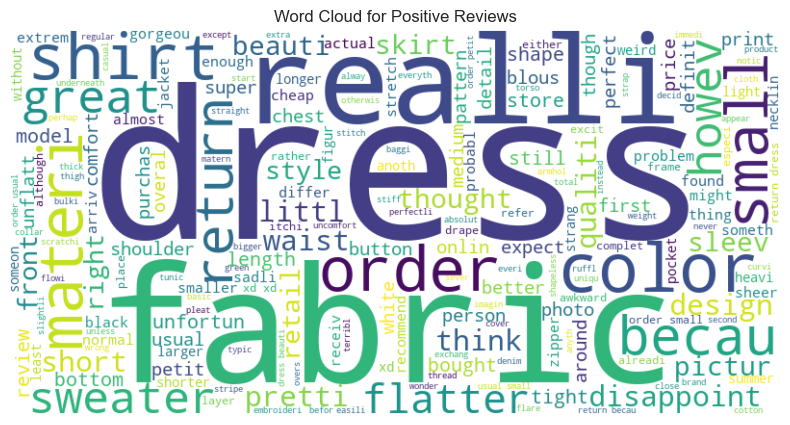

In [48]:
# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')  # Turn off the axis
plt.show()

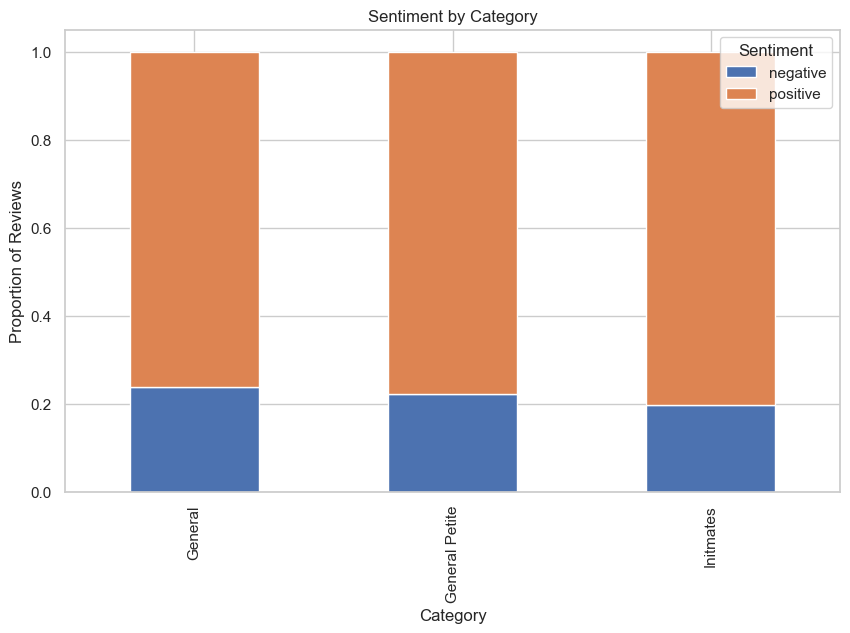

In [49]:
category_sentiment = data.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.show()

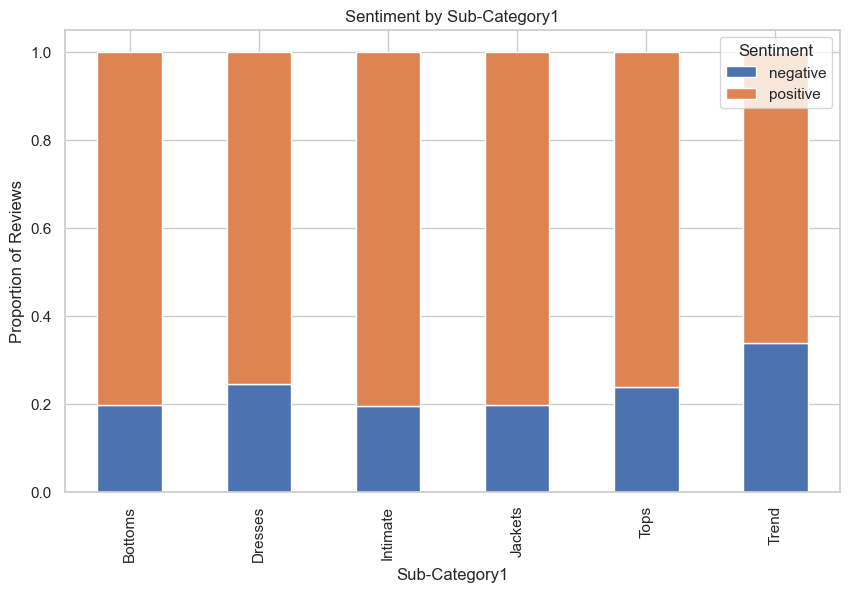

In [50]:
subcategory1_sentiment = data.groupby('Subcategory1')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
subcategory1_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Sub-Category1')
plt.xlabel('Sub-Category1')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.show()

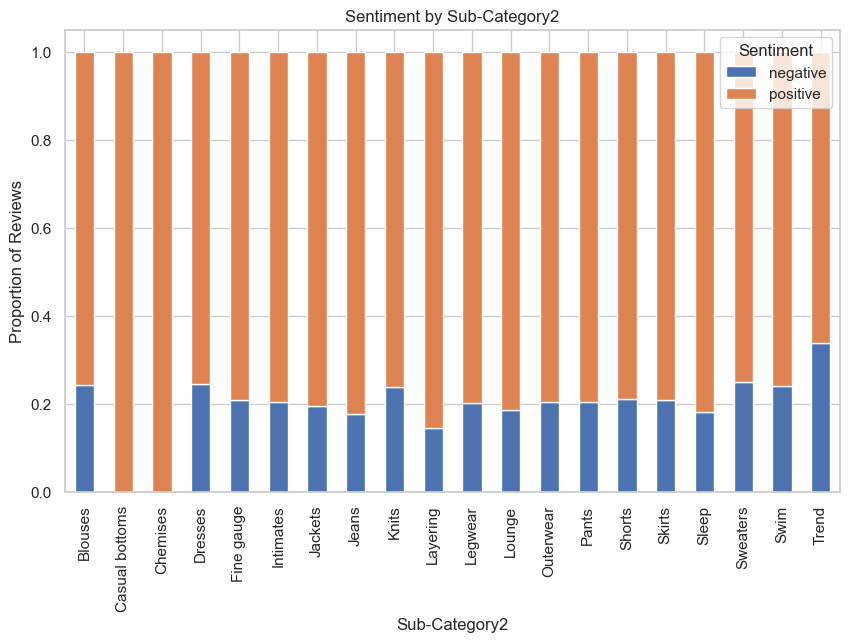

In [51]:
subcategory2_sentiment = data.groupby('SubCategory2')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
subcategory2_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Sub-Category2')
plt.xlabel('Sub-Category2')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.show()

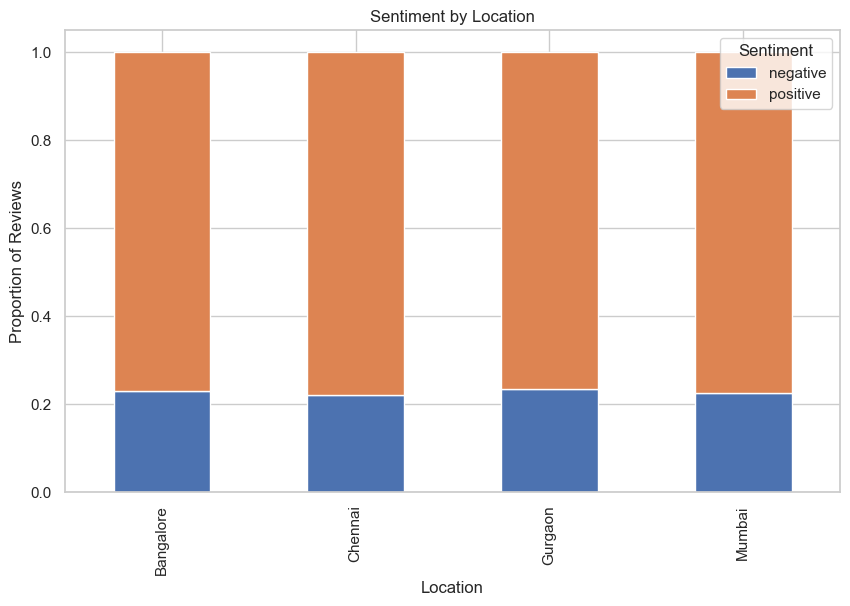

In [52]:
location_sentiment = data.groupby('Location')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
location_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Location')
plt.xlabel('Location')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.show()

In [53]:
dff = pd.DataFrame()

In [54]:
age_group_labels = ["10-25", "26-35", "36-40", "41-45", "46-50", "51-60", "61+"]
age_group_bins = [10, 25, 35, 40, 45, 50, 60, float("inf")]  # Adjust as needed

# Create age groups based on custom labels
dff['Age_Group'] = pd.cut(data['Customer_Age'], bins=age_group_bins, labels=age_group_labels, right=False)
dff['Sentiment'] = data['Sentiment']

In [55]:
dff

,Age_Group,Sentiment
0,26-35,positive
1,26-35,positive
2,61+,negative
3,51-60,positive
4,46-50,positive
...,...,...
22636,26-35,positive
22637,46-50,negative
22638,26-35,negative
22639,26-35,negative


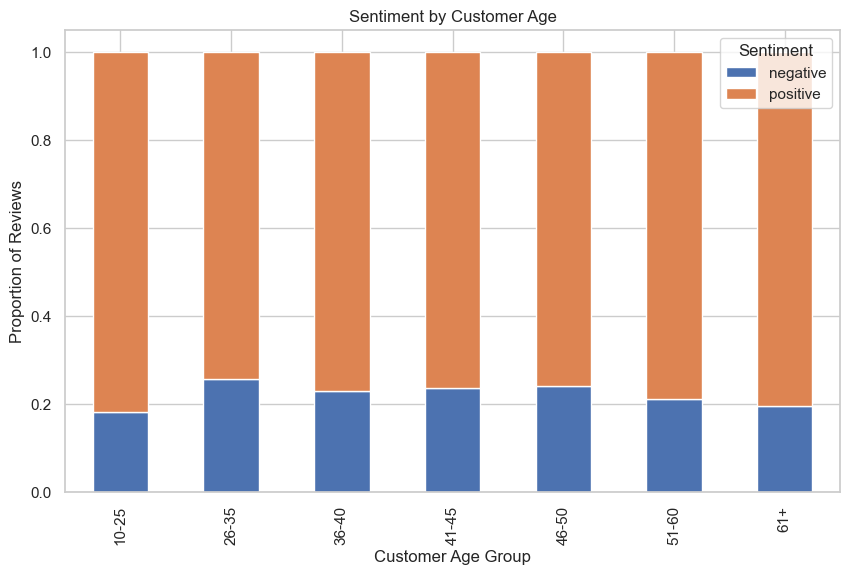

In [56]:
customer_age_sentiment = dff.groupby('Age_Group')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
customer_age_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Customer Age')
plt.xlabel('Customer Age Group')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.show()

##### Using FastTest to create embedding for Sentiment Analysis

In [57]:
import gensim
from gensim.models.fasttext import FastText
ftm = FastText(doc, vector_size=12)

In [58]:
type(ftm)

gensim.models.fasttext.FastText

In [59]:
ftm.wv['watch']

array([ 0.00867495, -0.01514033,  0.00630969, -0.00718627, -0.01579363,
        0.01257157, -0.00694166, -0.00435805,  0.01352309,  0.00291011,
        0.00868609, -0.00333936], dtype=float32)

In [60]:
def average_word_embedding(doc,feature_size):
    vector = np.zeros((feature_size),dtype='float64')
    total_words= len(doc)
    for word in doc:
        vector = np.add(vector,ftm.wv[word])
    vector = np.divide(vector,total_words)
    return vector

In [61]:
features = []
for sent in doc:
    features.append(average_word_embedding(sent.split(' '),12))

In [62]:
features = np.array(features)

In [63]:
df = pd.DataFrame(features)

In [64]:
df.shape

(22641, 12)

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.003582,0.001813,0.000017,0.004230,-0.001154,-0.000765,0.003829,0.000430,-0.005790,-0.009499,0.002327,0.000875
1,0.001480,0.000014,0.006769,0.001818,0.000443,0.000312,-0.004841,0.006910,-0.002741,-0.000184,-0.001668,-0.003376
2,-0.001607,0.000069,-0.000644,-0.002977,0.000678,0.000527,0.001685,0.002328,-0.005665,-0.005430,0.000845,-0.004313
3,-0.004389,0.007617,-0.002051,-0.000673,-0.000309,0.000258,0.006635,0.006545,0.001338,0.004789,0.002632,-0.002114
4,0.002908,0.003656,-0.000387,0.003381,-0.002218,-0.000095,-0.004399,0.000317,0.005060,0.005217,-0.007390,-0.006920


In [66]:
df1  = pd.concat([df, data['label']], axis=1)

In [67]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0.003582,0.001813,0.000017,0.004230,-0.001154,-0.000765,0.003829,0.000430,-0.005790,-0.009499,0.002327,0.000875,1
1,0.001480,0.000014,0.006769,0.001818,0.000443,0.000312,-0.004841,0.006910,-0.002741,-0.000184,-0.001668,-0.003376,1
2,-0.001607,0.000069,-0.000644,-0.002977,0.000678,0.000527,0.001685,0.002328,-0.005665,-0.005430,0.000845,-0.004313,0
3,-0.004389,0.007617,-0.002051,-0.000673,-0.000309,0.000258,0.006635,0.006545,0.001338,0.004789,0.002632,-0.002114,1
4,0.002908,0.003656,-0.000387,0.003381,-0.002218,-0.000095,-0.004399,0.000317,0.005060,0.005217,-0.007390,-0.006920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,-0.004378,0.005988,0.005544,0.001486,-0.009956,-0.005282,0.008605,0.005402,-0.004305,-0.007130,-0.006039,0.000179,1
22637,0.001396,-0.000892,-0.000288,-0.000534,-0.000364,-0.000050,0.003067,0.004921,-0.003960,0.001782,-0.008058,-0.000574,0
22638,0.004679,0.004968,0.004637,0.008417,-0.001693,0.000907,0.001826,0.005403,-0.006696,-0.000717,-0.000979,0.004062,0
22639,-0.000521,-0.001337,0.003169,0.000928,-0.002459,-0.006038,0.000291,0.003310,-0.002789,-0.001167,-0.004327,-0.004091,0



### Train-Test Split and Model Training

In [68]:
X  = df1.iloc[:,:-1]
Y = df1.iloc[:,-1:]

In [69]:
X.shape, Y.shape

((22641, 12), (22641, 1))

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state= 90, stratify=Y)

In [71]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((18112, 12), (4529, 12), (18112, 1), (4529, 1))

In [72]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [73]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [74]:
lr_labels = lr.predict(xtest)
rf_labels = rf.predict(xtest)

In [75]:
len(lr_labels)

4529

In [76]:
len(rf_labels)

4529

In [77]:
len(ytest)

4529

In [78]:
lr_accuracy = accuracy_score(ytest,lr_labels)
rf_accuracy = accuracy_score(ytest,rf_labels)

In [79]:
lr_accuracy

0.7705895341134908

In [80]:
rf_accuracy

0.7692647383528373

In [81]:
with open('Logisticmodel.pkl','wb') as file:
    pickle.dump(lr,file)

In [82]:
with open('Logisticmodel.pkl','rb') as file:
    lr2 = pickle.load(file)

In [83]:
print(classification_report(ytest,lr_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1039
           1       0.77      1.00      0.87      3490

    accuracy                           0.77      4529
   macro avg       0.39      0.50      0.44      4529
weighted avg       0.59      0.77      0.67      4529



In [178]:
#Some sample test for prediction
sample_text_testing1 = 'Absolutely amazing, everything about this product exceeded my expectations!'
sample_text_testing2 = 'The product didn’t fit as expected, and the recommendations felt random. I was disappointed with the overall experience.'

In [179]:
# Preprocessing sample text for checking prediction
preprocessed_text1 = clean_text(sample_text_testing1)
doc1 = list(preprocessed_text1)

features1 = []

for sent in doc1:
    features1.append(average_word_embedding(sent.split(' '),1))
    
predicted_probabilities1 = lr2.predict_proba(features1)
predicted_class1 = lr2.predict(features1)

In [180]:
predicted_class1

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [181]:
predicted_probabilities1

array([[2.34649046e-01, 7.65350954e-01],
       [9.52041760e-01, 4.79582398e-02],
       [2.27078702e-01, 7.72921298e-01],
       [4.57353572e-01, 5.42646428e-01],
       [4.60839023e-01, 5.39160977e-01],
       [5.42377516e-03, 9.94576225e-01],
       [6.90729153e-01, 3.09270847e-01],
       [2.31455938e-01, 7.68544062e-01],
       [2.34649046e-01, 7.65350954e-01],
       [5.41784666e-01, 4.58215334e-01],
       [2.34649046e-01, 7.65350954e-01],
       [9.99455731e-01, 5.44269380e-04],
       [2.31455938e-01, 7.68544062e-01],
       [6.11546679e-01, 3.88453321e-01],
       [5.14105789e-01, 4.85894211e-01],
       [6.11546679e-01, 3.88453321e-01],
       [6.63249805e-01, 3.36750195e-01],
       [1.01228516e-02, 9.89877148e-01],
       [6.90729153e-01, 3.09270847e-01],
       [3.65273423e-01, 6.34726577e-01],
       [2.31455938e-01, 7.68544062e-01],
       [6.90729153e-01, 3.09270847e-01],
       [3.65273423e-01, 6.34726577e-01],
       [1.75442100e-01, 8.24557900e-01],
       [2.314559

In [182]:
#Assuming you have binary classification (positive/negative)
if predicted_class1[0] == 1:
    sentiment = "positive"
else:
    sentiment = "negative"

print(f"Predicted Sentiment: {sentiment}")
print(f"Positive Probability: {predicted_probabilities1[0][1]}")
print(f"Negative Probability: {predicted_probabilities1[0][0]}")

Predicted Sentiment: positive
Positive Probability: 0.7653509535563503
Negative Probability: 0.2346490464436497


In [177]:
preprocessed_text2 = clean_text(sample_text_testing2)
doc2 = list(preprocessed_text2)

features2 = []

for sent in doc2:
    features2.append(average_word_embedding(sent.split(' '),1))
    
predicted_probabilities2 = lr2.predict_proba(features2)
predicted_class2 = lr2.predict(features2)

In [128]:
# Assuming you have binary classification (positive/negative)
if predicted_class2[0] == 1:
    sentiment = "positive"
else:
    sentiment = "negative"

print(f"Predicted Sentiment: {sentiment}")
print(f"Positive Probability: {predicted_probabilities2[0][1]}")
print(f"Negative Probability: {predicted_probabilities2[0][0]}")

Predicted Sentiment: negative
Positive Probability: 0.0029244284226252297
Negative Probability: 0.9970755715773748


#### Using FastTest to create embedding for Recommend Analysis

In [94]:
df2  = pd.concat([df, data['Recommend_Flag']], axis=1)

In [95]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,Recommend_Flag
0,0.003582,0.001813,0.000017,0.004230,-0.001154,-0.000765,0.003829,0.000430,-0.005790,-0.009499,0.002327,0.000875,1
1,0.001480,0.000014,0.006769,0.001818,0.000443,0.000312,-0.004841,0.006910,-0.002741,-0.000184,-0.001668,-0.003376,1
2,-0.001607,0.000069,-0.000644,-0.002977,0.000678,0.000527,0.001685,0.002328,-0.005665,-0.005430,0.000845,-0.004313,0
3,-0.004389,0.007617,-0.002051,-0.000673,-0.000309,0.000258,0.006635,0.006545,0.001338,0.004789,0.002632,-0.002114,1
4,0.002908,0.003656,-0.000387,0.003381,-0.002218,-0.000095,-0.004399,0.000317,0.005060,0.005217,-0.007390,-0.006920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,-0.004378,0.005988,0.005544,0.001486,-0.009956,-0.005282,0.008605,0.005402,-0.004305,-0.007130,-0.006039,0.000179,1
22637,0.001396,-0.000892,-0.000288,-0.000534,-0.000364,-0.000050,0.003067,0.004921,-0.003960,0.001782,-0.008058,-0.000574,1
22638,0.004679,0.004968,0.004637,0.008417,-0.001693,0.000907,0.001826,0.005403,-0.006696,-0.000717,-0.000979,0.004062,0
22639,-0.000521,-0.001337,0.003169,0.000928,-0.002459,-0.006038,0.000291,0.003310,-0.002789,-0.001167,-0.004327,-0.004091,1


In [96]:
X1  = df2.iloc[:,:-1]
Y1 = df2.iloc[:,-1:]

In [97]:
X1.shape, Y1.shape

((22641, 12), (22641, 1))

In [98]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, Y1, test_size=0.20, random_state= 90, stratify=Y)

In [99]:
lr1 = LogisticRegression()
lr1.fit(xtrain1,ytrain1)

LogisticRegression()

In [100]:
rf1 = RandomForestClassifier()
rf1.fit(xtrain1,ytrain1)

RandomForestClassifier()

In [101]:
lr_labels1 = lr1.predict(xtest1)
rf_labels1 = rf1.predict(xtest1)

In [102]:
lr_accuracy1 = accuracy_score(ytest1,lr_labels1)
rf_accuracy1 = accuracy_score(ytest1,rf_labels1)

In [103]:
print(classification_report(ytest1,lr_labels1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       815
           1       0.82      1.00      0.90      3714

    accuracy                           0.82      4529
   macro avg       0.41      0.50      0.45      4529
weighted avg       0.67      0.82      0.74      4529



In [104]:
stt1 = 'An innovative clothing product that combines exceptional quality with smart, personalized recommendations—absolutely impressed!'
stt2 = 'The product did not meet my expectations as the recommendations were inaccurate, and the clothing quality was below average.'

In [105]:
preprocessed_text3 = clean_text(stt1)
doc3 = list(preprocessed_text3)

features3 = []

for sent in doc3:
    features3.append(average_word_embedding(sent.split(' '),1))
    
predicted_probabilities3 = lr2.predict_proba(features3)
predicted_class3 = lr2.predict(features3)

In [106]:
predicted_probabilities3

array([[0.1754421 , 0.8245579 ],
       [0.64126593, 0.35873407],
       [0.64126593, 0.35873407],
       [0.45735357, 0.54264643],
       [0.51410579, 0.48589421],
       [0.23145594, 0.76854406],
       [0.98000305, 0.01999695],
       [0.46083902, 0.53916098],
       [0.45735357, 0.54264643],
       [0.69072915, 0.30927085],
       [0.36527342, 0.63472658],
       [0.23145594, 0.76854406],
       [0.99707557, 0.00292443],
       [0.6632498 , 0.3367502 ],
       [0.45735357, 0.54264643],
       [0.17163318, 0.82836682],
       [0.00542378, 0.99457622],
       [0.98000305, 0.01999695],
       [0.69072915, 0.30927085],
       [0.23145594, 0.76854406],
       [0.98000305, 0.01999695],
       [0.45735357, 0.54264643],
       [0.54178467, 0.45821533],
       [0.95204176, 0.04795824],
       [0.1754421 , 0.8245579 ],
       [0.64126593, 0.35873407],
       [0.23145594, 0.76854406],
       [0.61154668, 0.38845332],
       [0.18971372, 0.81028628],
       [0.98000305, 0.01999695],
       [0.

In [107]:
# Assuming you have binary classification (positive/negative)
if predicted_class3[0] == 1:
    recommend = "Customer wants to recommend product"
else:
    recommend = "Customer does not want to recommend product"

print(f"Predicted Recommend: {sentiment}")
print(f"Positive Probability: {predicted_probabilities3[0][1]}")
print(f"Negative Probability: {predicted_probabilities3[0][0]}")

Predicted Recommend: positive
Positive Probability: 0.824557900021719
Negative Probability: 0.17544209997828097


In [108]:
preprocessed_text4 = clean_text(stt2)
doc4 = list(preprocessed_text4)

features4 = []

for sent in doc4:
    features4.append(average_word_embedding(sent.split(' '),1))
    
predicted_probabilities4 = lr2.predict_proba(features4)
predicted_class4 = lr2.predict(features4)

In [109]:
# Assuming you have binary classification (positive/negative)
if predicted_class4[0] == 1:
    recommend = "Customer Recommends"
else:
    recommend = "Customer Not Recommends"

print(f"Predicted Recommend: {sentiment}")
print(f"Positive Probability: {predicted_probabilities4[0][1]}")
print(f"Negative Probability: {predicted_probabilities4[0][0]}")

Predicted Recommend: positive
Positive Probability: 0.0029244284226252297
Negative Probability: 0.9970755715773748
